In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense, Dropout


data1 = pd.read_csv('data_asking.csv')
data1.head()
# Misal data1 sudah ada
Y = data1['Total'].values
X = data1[['Temperature','Relative humidity','Wind speed','Rainfall',
           'Sunshine duration','Vapour pressure']].values


In [ ]:
data1[['Temperature','Relative humidity','Wind speed','Rainfall',
       'Sunshine duration','Vapour pressure','Total']].applymap(type).head()


/tmp/ipython-input-3738430675.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  'Sunshine duration','Vapour pressure','Total']].applymap(type).head()


,Temperature,Relative humidity,Wind speed,Rainfall,Sunshine duration,Vapour pressure,Total
0,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'float'>,<class 'int'>
1,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'float'>,<class 'int'>
2,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'float'>,<class 'int'>
3,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'float'>,<class 'int'>
4,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>,<class 'str'>,<class 'float'>,<class 'int'>


In [ ]:
data1 = data1.dropna()

In [ ]:
cols = ['Temperature','Relative humidity','Wind speed','Rainfall',
        'Sunshine duration','Vapour pressure','Total']

for c in cols:
    data1[c] = pd.to_numeric(data1[c], errors='coerce')


In [ ]:
data1[cols] = data1[cols].apply(pd.to_numeric, errors='coerce')
data1 = data1.dropna()


In [ ]:
Y = data1['Total'].values
X = data1[['Temperature','Relative humidity','Wind speed','Rainfall',
           'Sunshine duration','Vapour pressure']].values

In [ ]:
data1['Date'] = pd.to_datetime(data1['Date'], format='%Y/%m/%d')

# Corr

In [ ]:
print(data1.corr()['Total'])

Date                  -0.008447
Total                  1.000000
Influneza A            0.911068
Influneza B            0.676315
Male                   0.998761
Female                 0.998567
0–5 months             0.648798
6–11 months            0.812566
1 year                 0.902927
2 years                0.944340
3 years                0.951367
4 years                0.947305
5 years                0.938040
6 years                0.931129
7 years                0.918387
8 years                0.942429
9 years                0.928610
10–14 years            0.970834
15–19 years            0.937340
20–29 years            0.944017
30–39 years            0.968912
40–49 years            0.973471
50–59 years            0.960667
60–69 years            0.949985
70–79 years            0.920933
80 years and over      0.870261
Temperature           -0.528983
Minimum Temperature   -0.545301
Maximum Temperature   -0.490496
Relative humidity     -0.298525
Wind speed             0.081895
Rainfall

In [ ]:
data1['lag1'] = data1['Total'].shift(1)
print(data1[['Total','lag1']].corr())


          Total      lag1
Total  1.000000  0.841945
lag1   0.841945  1.000000


# Scaling

In [ ]:
Y = data1['Total'].values
X = data1[['Temperature','Relative humidity','Wind speed','Rainfall',
           'Sunshine duration','Vapour pressure']].values

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1,1))


# Modelling LSTM with X

In [ ]:
timesteps = 30

X_lstm = []
Y_lstm = []

for i in range(timesteps, len(X_scaled)):
    X_lstm.append(X_scaled[i-timesteps:i])
    Y_lstm.append(Y_scaled[i])

X_lstm = np.array(X_lstm)
Y_lstm = np.array(Y_lstm)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_lstm, Y_lstm, test_size=0.2, shuffle=False
)


In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(timesteps, X.shape[1])),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0154 - val_loss: 0.0251
Epoch 2/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0073 - val_loss: 0.0253
Epoch 3/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0070 - val_loss: 0.0248
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0058 - val_loss: 0.0245
Epoch 5/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0050 - val_loss: 0.0241
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0041 - val_loss: 0.0232
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - loss: 0.0045 - val_loss: 0.0222
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0045 - val_loss: 0.0243
Epoch 9/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0026 - val_loss: 0.0242
Epoch 10/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0031 - val_loss: 0.0231
Epoch 11/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0036 - val_loss: 0.0239
Epoch 12/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

In [ ]:
Y_pred_scaled = model.predict(X_test)

Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)
Y_test_actual = scaler_Y.inverse_transform(Y_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MSE:", mean_squared_error(Y_test_actual, Y_pred))
print("MAE:", mean_absolute_error(Y_test_actual, Y_pred))
MAE = mean_absolute_error(Y_test_actual, Y_pred)
print("MAE:", MAE)

MSE: 6812.722791664928
MAE: 36.394812066385995
MAE: 36.394812066385995


In [ ]:
print(np.isnan(X_lstm).sum())
print(np.isnan(Y_lstm).sum())


0
0


In [ ]:
err_pct = (MAE / Y_test_actual.mean()) * 100
print(err_pct)

91.67114317473164


# Visualisasi

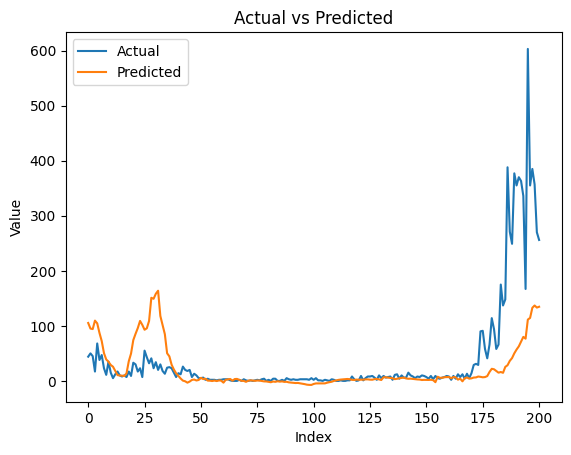

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(Y_test_actual, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


# Modelling LSTM Without X

In [ ]:
Y = data1['Total'].values

In [ ]:
scaler = MinMaxScaler()
Y_scaled = scaler.fit_transform(Y.reshape(-1,1))

In [ ]:
timesteps = 90
X_lstm = []
Y_lstm = []

for i in range(timesteps, len(Y_scaled)):
    X_lstm.append(Y_scaled[i-timesteps:i])
    Y_lstm.append(Y_scaled[i])

X_lstm = np.array(X_lstm)
Y_lstm = np.array(Y_lstm)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_lstm, Y_lstm, test_size=0.2, shuffle=False
)

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(timesteps, 1)),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, Y_train, epochs=150, batch_size=32, verbose=1)


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.0084
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 0.0034
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0034
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0029
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 200ms/step - loss: 0.0043
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 0.0031
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0040
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.0031
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 0.0023
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.0030
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - loss: 0.0030
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 143ms/step - loss: 0.0017
Epoch 13/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.0029
Epoch 14/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - loss: 0.0031
Epoch 15/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [ ]:
Y_pred_scaled = model.predict(X_test)
Y_pred = scaler.inverse_transform(Y_pred_scaled)
Y_test_actual = scaler.inverse_transform(Y_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test_actual, Y_pred))


23.642653352327837


In [ ]:
err_pct = (24.6665728905456 / Y_test_actual.mean()) * 100
print(err_pct)


62.321608106457525


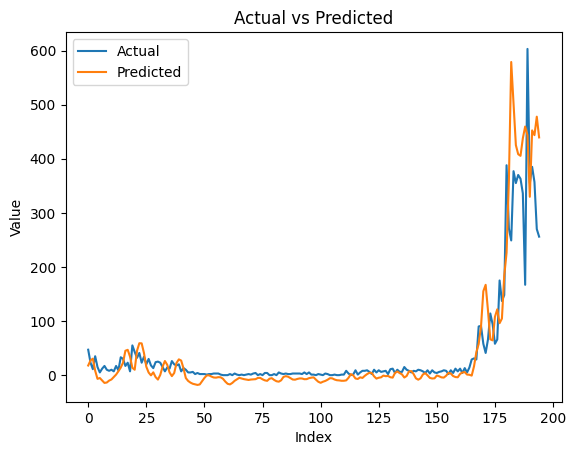

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(Y_test_actual, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()